In [49]:
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('HR_Dataset.csv')

In [4]:
data.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
12962,0.84,0.96,6,155,5,0,0,0,product_mng,medium
6925,0.35,0.54,3,138,4,0,0,0,support,low
13398,0.49,0.91,4,134,4,0,0,0,accounting,low
1046,0.86,1.00,4,250,6,0,1,0,support,medium
8360,0.51,0.91,3,227,2,0,0,0,technical,low


In [5]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [6]:
data.rename(columns={'Departments ':'departments'},inplace=True)

In [7]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'departments', 'salary'],
      dtype='object')

### Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [8]:
data.shape

(14999, 10)

### Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Get Overall Statistics About The Dataset

In [10]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Check Null Values In The Dataset

In [11]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
departments              0
salary                   0
dtype: int64

### Taking Care of Duplicate Values

In [12]:
data.duplicated().any()

True

In [13]:
data[data.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [14]:
data = data.drop_duplicates()

In [15]:
data.shape

(11991, 10)

In [16]:
14999 - 11991

3008

<Axes: xlabel='left'>

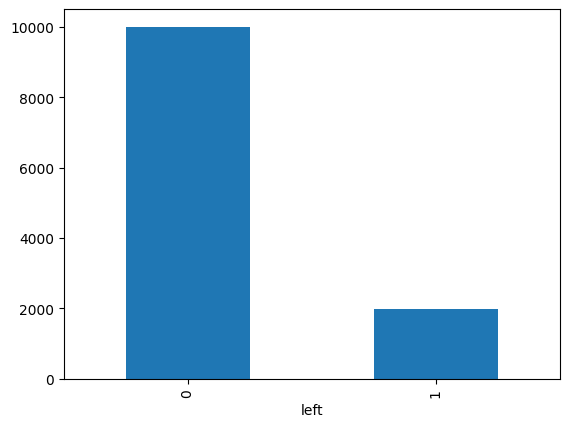

In [17]:
data['left'].value_counts().plot(kind='bar')

### Store Feature Matrix In X and Response(Target) In Vector y

In [18]:
X = data.drop(columns=['left'])

In [19]:
y = data['left']

In [20]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: left, Length: 11991, dtype: int64

### Column Transformer and Pipeline

In [21]:
data.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low


In [22]:
preprocessor = ColumnTransformer(transformers=[
    ('num',StandardScaler(),['satisfaction_level',
                            'last_evaluation',
                            'number_project',
                            'average_montly_hours',
                            'time_spend_company',
                            'Work_accident','promotion_last_5years']),
    ('nominal',OneHotEncoder(),['departments']),
    ('ordinal',OrdinalEncoder(),['salary'])
    
    
],remainder='passthrough')

In [23]:
pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',LogisticRegression())
    
])

In [24]:
from sklearn import set_config

In [25]:
set_config(display='diagram')

In [26]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', LogisticRegression())])

### Splitting The Dataset Into The Training Set And Test Set

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)

In [28]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', LogisticRegression())])

In [29]:
y_pred = pipeline.predict(X_test)

In [30]:
accuracy_score(y_test,y_pred)

0.8370154230929554

In [31]:
precision_score(y_test,y_pred)

0.5209580838323353

In [32]:
recall_score(y_test,y_pred)

0.2185929648241206

In [33]:
def model_scorer(model_name,model):
    
    output=[]
    
    output.append(model_name)
    
    pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',model)])
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)
    
    pipeline.fit(X_train,y_train)
    
    y_pred = pipeline.predict(X_test)
    
    output.append(accuracy_score(y_test,y_pred))
    
    output.append(precision_score(y_test,y_pred))
    
    output.append(recall_score(y_test,y_pred))
    
    return output

In [34]:
model_dict={
    'log':LogisticRegression(),
    'decision_tree':DecisionTreeClassifier(),
    'random_forest':RandomForestClassifier(),
    'XGB':XGBClassifier()
    
}

In [35]:
model_output=[]
for model_name,model in model_dict.items():
    model_output.append(model_scorer(model_name,model))

In [36]:
model_output

[['log', 0.8370154230929554, 0.5209580838323353, 0.2185929648241206],
 ['decision_tree', 0.9683201333889121, 0.8870192307692307, 0.9271356783919598],
 ['random_forest', 0.9858274280950396, 0.989247311827957, 0.9246231155778895],
 ['XGB', 0.9837432263443101, 0.9686684073107049, 0.9321608040201005]]

In [37]:
preprocessor = ColumnTransformer(transformers=[
    ('num',StandardScaler(),['satisfaction_level',
                            'last_evaluation',
                            'number_project',
                            'average_montly_hours',
                            'time_spend_company',
                            'Work_accident','promotion_last_5years']),
    ('nominal',OneHotEncoder(),['departments']),
    ('ordinal',OrdinalEncoder(),['salary'])
    
    
],remainder='passthrough')

In [38]:
pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',RandomForestClassifier())
    
])

In [39]:
pipeline.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', RandomForestClassifier())])

In [40]:
sample = pd.DataFrame({
   'satisfaction_level':0.38,
   'last_evaluation':0.53,
    'number_project':2,
    'average_montly_hours':157,
    'time_spend_company':3,
    'Work_accident':0,
    'promotion_last_5years':0,
    'departments':'sales',
    'salary':'low'
    
    
},index=[0])

In [41]:
result = pipeline.predict(sample)

if result == 1:
    print("An Employee may leave the organization")
else:
    print("An Employee may stay with the organization")

An Employee may leave the organization


### Save The Model

In [42]:
import pickle

In [43]:
with open('pipeline.pkl','wb') as f:
    pickle.dump(pipeline,f)

In [44]:
with open('pipeline.pkl','rb') as f:
    pipeline_saved = pickle.load(f)

In [45]:
result = pipeline_saved.predict(sample)

if result == 1:
    print("An Employee may leave the organization")
else:
    print("An Employee may stay with the organization")

An Employee may leave the organization


### GUI - 1

In [46]:
import pickle
import pandas as pd
from tkinter import *

def show_entry():
    with open('pipeline.pkl','rb') as f:
        pipeline = pickle.load(f)
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())
    p8 = str(clicked.get())
    p9 = str(clicked1.get())
    sample = pd.DataFrame({
        'satisfaction_level': [p1],
        'last_evaluation': [p2],
        'number_project': [p3],
        'average_montly_hours': [p4],
        'time_spend_company': [p5],
        'Work_accident': [p6],
        'promotion_last_5years': [p7],
        'departments': [p8],
        'salary': [p9]
    })
    result = pipeline.predict(sample)
    print(result)
    if result == 1:
        Label(master, text="An employee may leave the organization.").grid(row=31)
    else:
        Label(master, text="An employee may stay with the organization.").grid(row=31)

master =Tk()
master.title("Predicting Employee Churn Using Machine Learning")
label = Label(master,text = "Status of Employee Churn",bg = "black",
               fg = "white").grid(row=0,columnspan=2)

Label(master,text = "Employee satisfaction level").grid(row=1)
Label(master,text = "Last evaluation score").grid(row=2)
Label(master,text = "Number of projects assigned to").grid(row=3)
Label(master,text = "Average monthly hours worked").grid(row=4)
Label(master,text = "Time spent at the company").grid(row=5)
Label(master,text = "Whether they have had a work accident (1= Yes, 0 = No)").grid(row=6)
Label(master,text = "Whether they have had a promotion in the last 5 years (1 = Yes, 0 = No)").grid(row=7)
Label(master,text = "Department name").grid(row=8)
Label(master,text = "Salary category").grid(row=9)

clicked = StringVar()
options = ['sales', 'technical', 'support', 'IT', 'product_mng', 'marketing',
       'RandD', 'accounting', 'hr', 'management']

clicked1 = StringVar()
options1 = ['low', 'medium', 'high']

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = OptionMenu(master , clicked , *options )
e8.configure(width=15)
e9 = OptionMenu(master , clicked1 , *options1 )
e9.configure(width=15)
e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
Button(master,text="Predict",command=show_entry).grid()
mainloop()

[0]
[0]


### GUI - 2

In [50]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import joblib
from tkinter import messagebox

def open_file():
    filepath=filedialog.askopenfilename(filetypes=[("CSV Files",".csv")])
    if filepath:
        try:
            data=pd.read_csv(filepath)
            data.columns = data.columns.str.replace('\n', '')
            data.rename(columns={'Departments ':'departments'},inplace=True)
            data = data.drop_duplicates()
            process_data(data)
        except Exception as e:
            messagebox.showerror("Error",f"Failed to open file {e}")
            print(f"Failed to open file {e}")
def process_data(data):
    with open('pipeline.pkl','rb') as f:
        pipeline = pickle.load(f)
    result=pipeline.predict(data)
    
    y_pred = ["An employee may leave the organization." if pred == 1 
              else "An employee may stay with the organization." 
              for pred in result]
    data['Predicted_target']=y_pred
    save_file(data)
def save_file(data):
    savepath=filedialog.asksaveasfilename(defaultextension=".csv",
                              filetypes=[("CSV Files",".csv")])
    if savepath:
        try:
            data.to_csv(savepath)
            messagebox.showinfo("Success","File Saved Successfully")
        except Exception as e:
            messagebox.showerror("Error",f"Failed to save file:{e}")
root = tk.Tk()
root.title("Classification")
root.geometry("200x200")
button1 = tk.Button(root,text="Open CSV File",
                   width=15,
                   height=2,
                   background="lightgreen",
                   activebackground="lightblue",
                   font=("Arial",11,"bold"),
                   command=open_file)

button1.pack(pady=50)
root.mainloop()